# **Natalia's and Karina's workshop on timeseries and models**

We will explore dataset of daily female birth from Kaggle 🌸🤱🏽👧🏼

In [2]:
from IPython.display import display, Image #for image inserting
import pandas as pd #work with datasets
!pip install statsmodels
import statsmodels # for test in statistics
import matplotlib.pyplot as plt # for plotting
import statsmodels.api as sm 
import numpy as np # for numpy datasets
!pip install sktime
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from statsmodels.tsa.stattools import adfuller # Import augmented dicky-fuller test function
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
!pip install pmdarima 
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.arima_model import ARMA  # Import the ARMA model

     |████████████████████████████████| 9.5 MB 7.1 MB/s 
     |████████████████████████████████| 231 kB 83.9 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 5.7 MB 1.8 MB/s 
     |████████████████████████████████| 3.2 MB 50.8 MB/s 
     |████████████████████████████████| 25.3 MB 42.8 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.5 MB 20.3 MB/s 
     |████████████████████████████████| 2.1 MB 57.4 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


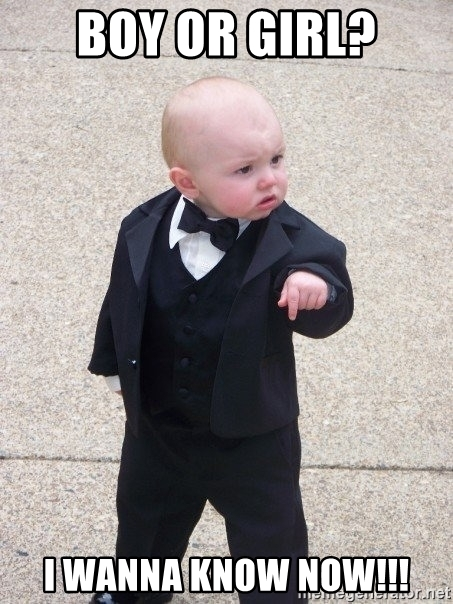

In [3]:
display(Image(filename='/work/boy-or-girl-i-wanna-know-now.jpg'))

### The purpose of the workshop is to understand and show how to work with time series, namely: 
- finding the appropriate dataset and exploring 
- splitting into test and train set  
- determine the stationarity of the series 
- determine models: AR, MA or ARMA via ACF and PACF 
- searching of model parameters by Auto-ARIMA and checking by hand-selecting method 
- constructing the model and interpreting the result 

<hr color=grey>

1) **Dataset**

We have dataset of the number of female births between the period from January 1959 to January 1960 - just one year period. The data of the some American city. It was copied from the open resource GitHub for learning goals.

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', sep=',', encoding='utf-8-sig') #read our ABT

In [71]:
df.to_csv('Data.csv')

Let us look at it:

In [107]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Here we see 2 columns: first one is day and the second on is units of girls.

In [108]:
type(df)

pandas.core.frame.DataFrame

See that we have type of the dataset is DATAFRAME - it is not ok to work with it -> we will rewrite it as Series:

In [109]:
df["Date"] = pd.to_datetime(df["Date"])
series_birth = pd.Series(df['Births'].values , index=df['Date']).fillna(0) 
series_birth = series_birth.asfreq('d')

In [110]:
series_birth

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Freq: D, Length: 365, dtype: int64

In [111]:
type(series_birth)

pandas.core.series.Series

<hr color=grey>

2) **Add special libraries for work with time-series data:**

SKTIME - a unified framework for machine learning with time series

read more here https://www.sktime.org/en/latest/ 🌚

In [77]:
!pip install sktime

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


<hr color=grey>

3) **Visualization of our time-series of daily female birth**

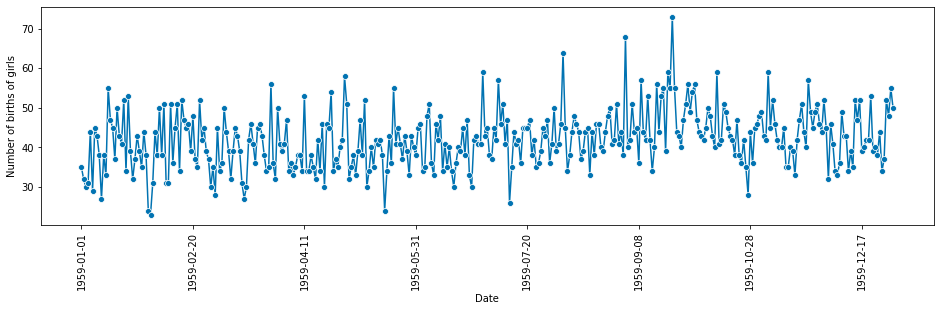

In [112]:
series_birth.index = series_birth.index.to_period('D')

plot_series(series_birth)

plt.xlabel('Date')
plt.ylabel('Number of births of girls')
_ = plt.xticks(rotation=90)

Here you can see the beautiful plot with very unclear trend.

<hr color=grey>

4) **Dividing into test and train part for further training on forecasting models**

Use library to divide on test and train part:

In mostly cases of machine learning it is ok to use 30% of given data as test size, we will do it:

In [113]:
y_train, y_test = temporal_train_test_split(series_birth, test_size=30)

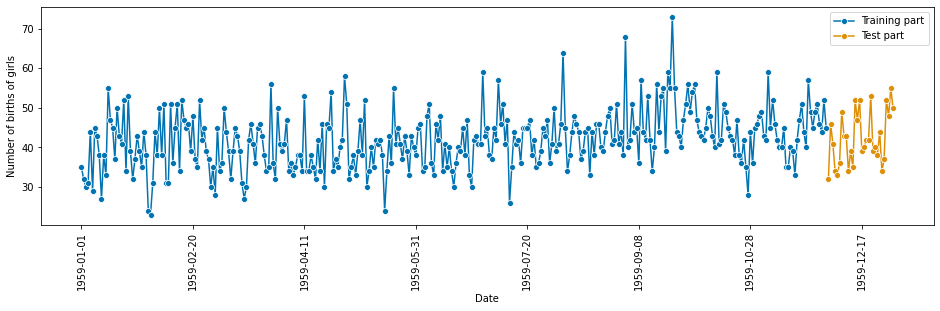

In [116]:
plot_series(y_train, y_test, labels=['Training part', 'Test part']);
plt.xlabel('Date')
plt.ylabel('Number of births of girls')
_ = plt.xticks(rotation=90)

<hr color=grey>

4) **Checking for stationarity**

Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you can use ARIMA models.

The augmented Dicky-Fuller test is one of tests to identify whether a time series is non-stationary. This is a statistical test, where the null hypothesis is that your time series is non-stationary due to trend. Since the augmented Dickey Fuller Test is a unit root test for stationarity, it has a relatively high Type I error rate. Therefore, it should be used with caution. 

$H_0:$ the time series is non-stationary due to trend. 

$H_0:$ the time series is stationary due to trend. 

Let us do ot with Dicky-Fuller test on the births time series to test for stationarity: 

The model: No constant, no trend. 

$Δ y_t = γ y_{t-1} + \sum_{s = 1}^{m} a_s Δ y_{t-s} + v_t$ 

In [117]:
# Run dicky-fuller test 
result = adfuller(df['Births']) 

!!! So let us see that if data is not stationary this would mean that the number of births of girls per day has a trend (changing)  

We can check stationarity by looking twice at a plot and also considering Dicky-Fuller test

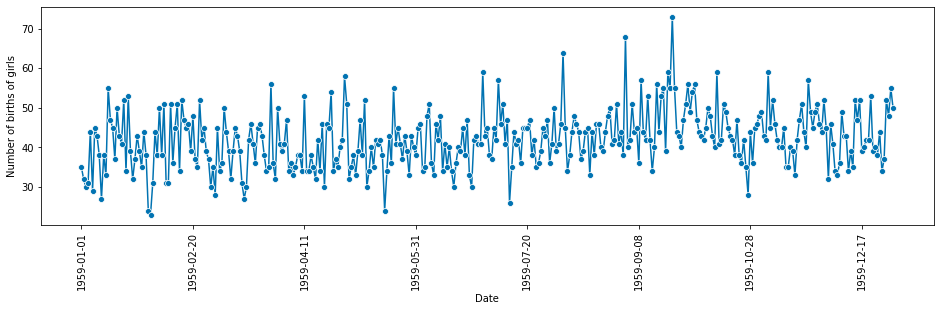

In [118]:
plot_series(series_birth)
plt.xlabel('Date')
plt.ylabel('Number of births of girls')
_ = plt.xticks(rotation=90)

Print test statistic

In [119]:
print('ADF Statistic:', result[0])

ADF Statistic: -4.808291253559764


Print p-value

In [120]:
print('p-value:', result[1])

p-value: 5.2434129901498554e-05


Interpreting the test result: 

- The zeroth element is the test statistic, in this case it is -4.808. The more negative this number is, the more likely that the data is stationary. 

Therefore, the data is likely to be stationary. 

- The first item in the results tuple, is the test p-value, in this case it is 5.243e-05. If the p-value is smaller than 0.05, we reject the null hypothesis that time series is non-stationary. 

Therefore, we assume that the time series must be stationary. 

Is it stationary? 
**Yes**, the plot appears to be stationary: 
- because the plot does not have a trend 
- because in the plot, the variance does not change with time 

<hr color=grey>

5) **Seasonal decompose**

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


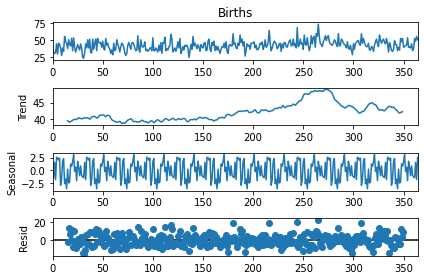

In [121]:
# Perform additive decomposition
decomp = seasonal_decompose(df['Births'], freq=30)

# Plot decomposition
decomp.plot();
plt.tight_layout();
plt.show()

You may think of a time series as composed of components of pattern, periodic and residual. When you go about modeling it, this can be a nice way to think about the data. You will break it down into these elements if you know the length of the time sequence.

<hr color=grey>

6) **Test this data for seasonality**


This is how we choose which ARIMA model to fit. 

One of the main ways to identify the correct model order is by using 
- the autocorrelation function, the ACF (the set of correlation values for different lags) 
- the partial autocorrelation function the PACF (the correlation between a time series and the lagged version of itself after we subtract the effect of correlation at smaller lags) 

To make a model (ARIMA, ARMA, AR, MA) we firstly have to decide which one we want to fit. 

By comparing the ACF and PACF for the time series, we can determine the order of the model. 

Here, how we can determine different types of models: 

- If the amplitude of the ACF tails off with increasing lag and the PACF cuts off after some lag p, then we have a AR(p) model. 

- If the amplitude of the ACF cuts off after some lag q and the amplitude of the PACF tails off then we have a MA(q) model. 

- If both the ACF and PACF tail off then we have an ARMA model. 


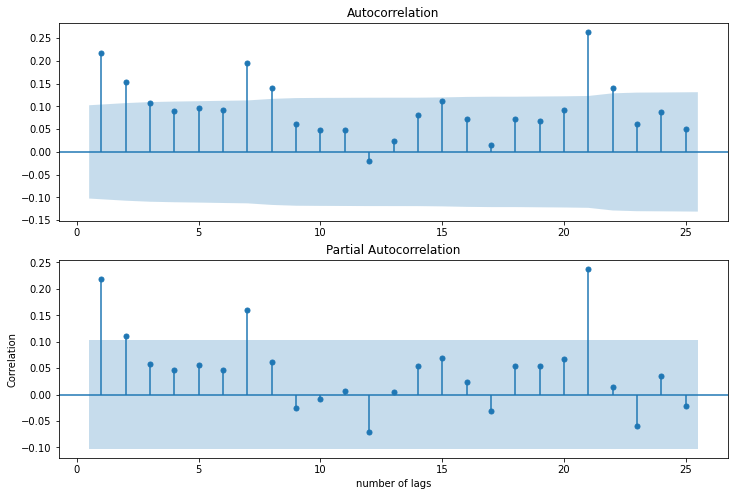

In [122]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8)) 
 
# Plot the ACF 
plot_acf(df['Births'], lags=25, zero=False, ax=ax1)
plt.xlabel('number of lags')
plt.ylabel('Correlation')
# Plot the PACF 

plot_pacf(df['Births'], lags=25, zero=False, ax=ax2)
plt.xlabel('number of lags')
plt.ylabel('Correlation')

plt.show()

According to the graphs, we can conclude that both the ACF and PACF tail off, theferore we have an ARMA model. 

You can notice that if the ACF values are high and tail off very very slowly, this might mean that the data is non-stationarity. In such case, it needs to be differenced. 
Also, if the autocorrelation at lag-1 is very negative, this might mean that you have taken the difference too many times. 

So, now we have to apply the ARMA(p,q). 

<hr color=grey>

7) **Searching over model order (p and q)** 

**Auto-ARIMA**

This example demonstrates how we can use the ``auto_arima`` function to
select an optimal time series model. 👀


ARIMAResults include aic and bic . By their definition , these criteria penalise the number of parameters in the model. But it is possible to use a special library: 

Now there is a proper python package to make auto-arima. https://github.com/tgsmith61591/pmdarima

Doctors: http://alkaline-ml.com/pmdarima

About choosing the parametres for auto-arima you can read more here https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In our case, we use default parametres mostly.

fitting a stepwise model:

In [25]:
modl = pm.auto_arima(y_train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, # set to stepwise
                     suppress_warnings=True, # don't want convergence warnings
                     D=10, 
                     max_D=10, 
                     error_action='ignore')  # don't want to know if an order does not work


Create predictions for the future, evaluate on test and print error:

In [26]:
preds, conf_int = modl.predict(n_periods=y_test.shape[0], return_conf_int=True)
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, preds)))

Test RMSE: 7.159


Create the summary for auto-arima to compare with hand-writen results:

In [27]:
modl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1126.336
Date:                Wed, 03 Mar 2021   AIC                           2258.672
Time:                        14:09:12   BIC                           2270.105
Sample:                             0   HQIC                          2263.231
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1112      0.062      1.790      0.074      -0.011       0.233
ma.L1         -0.9600      0.019    -51.641      0.000      -0.996      -0.924
sigma2        49.3889      3.348     14.752      0.000      42.827      55.951
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                26.10
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.59
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We got the AIC score = 2258.672 and the BIC score = 2270.105. 
In the summary we observe that the model is SARIMAX(1, 1, 1), hence, (p, q) = (1, 1). 

Now we know the order, p = 1 and q = 1. 
We can create a model, fit it and print the summary. 

**Autoregressive moving-average model - ARMA model** 

ARMA = AR + MA 

ARMA(p, q) 
- p is order of AR part 
- q is order of MA part 

ARMA(1, 1) model: 

$$ y_t = a_1 y_{t-1} + m_1 \epsilon_{t-1} +  \epsilon_{t} $$ 

Here, 
- ar.L1.y = 0.1112 
- ma.L1.y = -0.9600 

Moreover, the list of ar_coefs has the form $[1, -a_1, -a_2, ..., -a_p]$, therefore we eill use -0.1112. 
Therefore, the model is: 

$$ y_t = -0.1112 \cdot y_{t-1} -0.9600 \cdot \epsilon_{t-1} +  \epsilon_{t} $$ 

**Plot the points and the forecasts**

Text(0, 0.5, 'Number of births of girls')

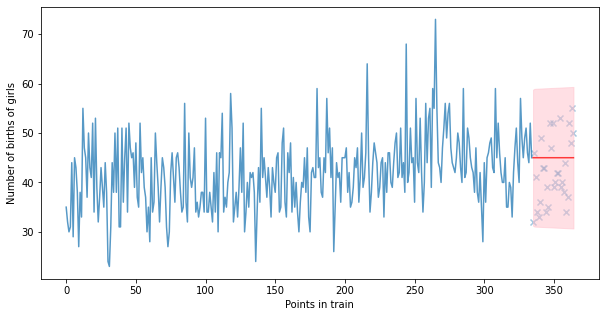

In [28]:
plt.figure(figsize = (10, 5))
x_axis = np.arange(y_train.shape[0] + preds.shape[0])
x_years = x_axis 

plt.plot(x_years[x_axis[:y_train.shape[0]]], y_train, alpha=0.75, label='Observed')
plt.plot(x_years[x_axis[y_train.shape[0]:]], preds, alpha=0.75, label='Forecast', color='red')  # Forecasts
plt.scatter(x_years[x_axis[y_train.shape[0]:]], y_test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.5, color='pink')
plt.xlabel("Points in train")
plt.ylabel('Number of births of girls')

Here we see that if you are unsure of the best parameters for your model, let auto_arima figure it out for you. auto_arima is similar to an ARIMA-specific grid search, but (by default) uses a more intelligent stepwise algorithm

In the plot the axis is a days in 1959 year from 0 (that is 1959-01-01) to 364 (that is 1959-12-31)

**Hand-selection**

Above, we used the Auto-ARIMA function. However, now, for educational purposes (to better understand how the function works), we reproduce the results of the Auto-ARIMA "by hand" by cycle. 

Since both of the orders p and q are non-zero, we can't use the ACF and PACF to choose the order of a model. 
In this case, we will use the AIC and the BIC. 

In [29]:
order_aic_bic=[]

for p in range(3):
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df['Births'], order=(p, 0, q)) 
        results = model.fit()
        
        order_aic_bic.append((p, q, results.aic, results.bic)) 

/root/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Construct DataFrame from order_aic_bic

Print order_df in order of increasing AIC and order_df in order of increasing BIC

In [30]:
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC']) 

print(order_df.sort_values('AIC')) 

print(order_df.sort_values('BIC')) 

   p  q          AIC          BIC
7  2  1  2471.357849  2486.957438
5  1  2  2471.852868  2487.452458
8  2  2  2473.205920  2492.705406
4  1  1  2474.495617  2486.195309
6  2  0  2574.084165  2585.783857
3  1  0  2656.890623  2664.690417
2  0  2  3188.684083  3200.383775
1  0  1  3407.163868  3414.963663
0  0  0  3776.975953  3780.875850
   p  q          AIC          BIC
4  1  1  2474.495617  2486.195309
7  2  1  2471.357849  2486.957438
5  1  2  2471.852868  2487.452458
8  2  2  2473.205920  2492.705406
6  2  0  2574.084165  2585.783857
3  1  0  2656.890623  2664.690417
2  0  2  3188.684083  3200.383775
1  0  1  3407.163868  3414.963663
0  0  0  3776.975953  3780.875850


We are sorting by the AIC score and also by the BIC score. 
We will choose the model with the lowest AIC score - (p, q) = (2, 1) (it is also in the second place (by minimum values), according to the BIC score). 

Also, we see that if we sort the results first by BIC and then by AIC, the model will be (p, q) = (1, 1). 

This is the model we got as a result of Auto-ARIMA, so it coincided. 

Both, for Auto-ARIMA and hand-selection we know the order is p = 1 and q = 1. 

We can create a model, fit it and print the summary. 

<hr color=grey>

8) **Start with a Naive Approach**

Forecasting technique which assumes that the next expected point is equal to the last observed point is called **Naive Method**

Hence, $\hat{y_{t+1}} = y_{t}$

In [59]:
train = df[0:335] 
test = df[335:]

Now we will implement the Naive method using python to forecast the prices for test data, however there is method in sktime - but we could not manage with it (https://www.sktime.org/en/latest/api_reference/modules/auto_generated/sktime.forecasting.naive.NaiveForecaster.html) - here is the description of this function:

In [44]:
df.Timestamp = pd.to_datetime(df.Date, format='%Y-%m-%d') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Date, format='%Y-%m-%d') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Date, format='%Y-%m-%d') 
test.index = test.Timestamp 
test = test.resample('D').mean()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


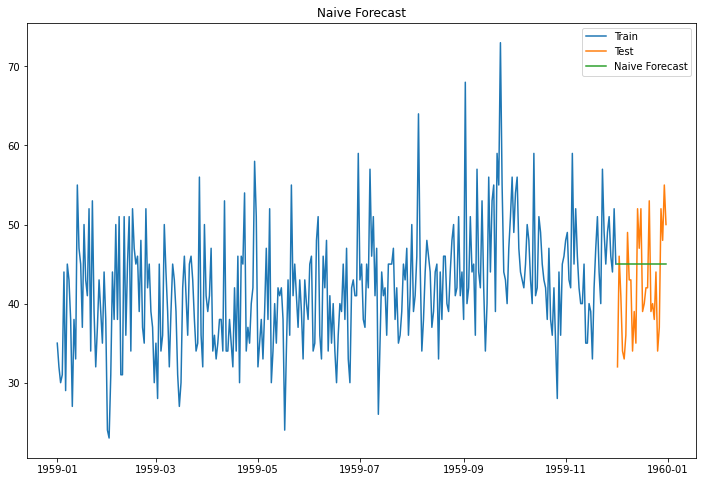

In [47]:
dd= np.asarray(train.Births)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Births'], label='Train')
plt.plot(test.index,test['Births'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

We will now calculate RMSE to check to accuracy of our model on test data set:

In [50]:
rms = sqrt(mean_squared_error(test.Births, y_hat.naive))
print(rms)

7.157746386491584


The RMSE value and the graph above show that the Naive approach is not ideal for this datasets (for auto-arima RMSE is better)). Using various strategies, we can still increase our score.

<hr color=grey>

9) **ARIMA models** 

ARIMA - autoregressive integrated moving average model. 

We cannot apply an ARMA model to non-stationary time series. 

In case of non-stationary time series, we need to take the difference of the time series to make it stationary. Only then can we model it. 

We have shown above that our time series are stationary, therefore, we do not have to need to take the difference of the time series to make it stationary. 

We can implement an ARIMA model using the SARIMAX model class from statsmodels. 

The ARIMA model has three model orders: 
- p the autoregressive order 
- d the order of differencing 
- q the moving average order 

ARMA model - setting the middle order parameter d to zero. 

ARIMA(p, 0, q) = ARMA(p, q) 

As we already have a stationary data, we do not have to difference the time series data. 

This means that the middle order parameter d == 0, therefore, we will use the ARMA model. 

We have to apply an ARMA(1,1) model. We fit the model as before and make forecasts. 

However, if your time series data is non-stationary, you have to select the right amount of differencing carefully. 
It is important to understand that you have to difference the data only until it is stationary and no more. 

After differencing, you have to check if the time series is stationary. 

In [68]:
model = ARMA(y_train, order=(1, 1)) 

results = model.fit() 

print(results.summary()) 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  335
Model:                     ARMA(1, 1)   Log Likelihood               -1129.773
Method:                       css-mle   S.D. of innovations              7.048
Date:                Wed, 03 Mar 2021   AIC                           2267.547
Time:                        14:43:43   BIC                           2282.803
Sample:                    01-01-1959   HQIC                          2273.629
                         - 12-01-1959                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9121      1.464     28.623      0.000      39.042      44.782
ar.L1.y        0.9777      0.034     28.941      0.000       0.911       1.044
ma.L1.y       -0.9069      0.080    -11.287      0.0

**Autoregressive moving-average model - ARMA model** 

ARMA = AR + MA 

ARMA(p, q) 
- p is order of AR part 
- q is order of MA part 

ARMA(1, 1) model: 

$$ y_t = a_1 y_{t-1} + m_1 \epsilon_{t-1} +  \epsilon_{t} $$ 

Here, 
- ar.L1.y = 0.9777 
- ma.L1.y = -0.9069 

Moreover, the list of ar_coefs has the form $[1, -a_1, -a_2, ..., -a_p]$, therefore we eill use -0.9777. 
Therefore, the model is: 

$$ y_t = -0.9777 \cdot y_{t-1} -0.9069 \cdot \epsilon_{t-1} +  \epsilon_{t} $$ 

When we searched by hand-selection for p and q, we denoted that (p, q) = (2, 1). Let us do the same for these p and q. 

We have to apply an ARMA(2,1) model. We fit the model as before and make forecasts. 

In [32]:
model1 = ARMA(y_train, order=(2, 1)) 

results1 = model1.fit() 

print(results1.summary()) 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  335
Model:                     ARMA(2, 1)   Log Likelihood               -1128.238
Method:                       css-mle   S.D. of innovations              7.015
Date:                Wed, 03 Mar 2021   AIC                           2266.476
Time:                        14:09:20   BIC                           2285.546
Sample:                    01-01-1959   HQIC                          2274.079
                         - 12-01-1959                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9380      1.768     23.714      0.000      38.472      45.404
ar.L1.y        1.0973      0.062     17.659      0.000       0.976       1.219
ar.L2.y       -0.1062      0.059     -1.813      0.0

**Autoregressive moving-average model - ARMA model** 

ARMA = AR + MA 

ARMA(p, q) 
- p is order of AR part 
- q is order of MA part 

ARMA(1, 1) model: 

$$ y_t = a_1 y_{t-1} + a_2 y_{t-2} + m_1 \epsilon_{t-1} + \epsilon_t $$ 

Here, 
- ar.L1.y = 1.0973 
- ar.L2.y = -0.1062 
- ma.L1.y = -0.9501 

Moreover, the list of ar_coefs has the form $[1, -a_1, -a_2, ..., -a_p]$, therefore we eill use -1.0973 and 0.1062. 
Therefore, the model is: 

$$ y_t = -1.0973 y_{t-1} + 0.1062 y_{t-2} -0.9501 \epsilon_{t-1} + \epsilon_t $$ 

<hr color=grey>

10) **One-step-ahead prediction** 

We can make lots of these predictions in-sample in the time frame for which we have data; to approximate the next ones, use the previous series value. A one-step-ahead forecast is called this.

In [92]:
one_step_forecast = results.forecast(steps=30) 

mean_forecast = np.array(one_step_forecast[0]) 

confidence_intervals = np.array(one_step_forecast[2])

lower_limits = confidence_intervals[:,0]
upper_limits = confidence_intervals[:,1]

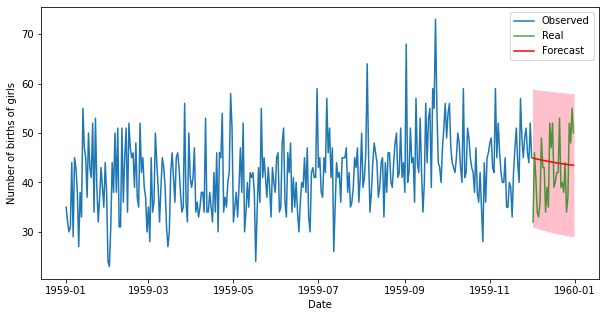

In [93]:
plt.figure(figsize = (10, 5))

plt.plot(y_train.index, y_train, label='Observed');
plt.plot(y_test.index, y_test, label='Real', color='g', alpha=0.7);

plt.plot(y_test.index, mean_forecast, color='r', label='Forecast');
plt.fill_between(y_test.index, lower_limits, upper_limits, color='pink');

# Set labels, legends
plt.xlabel('Date');
plt.ylabel('Number of births of girls')
plt.legend();

For the last 30 days with data available, we made forecasts, still predicting only one day forward. You will determine how the model performs in making predictions for the next day, where you do not know the result, by testing these predictions.


<hr color=grey>

11) **Better prediction - SARIMAX** 

Add library and start work with SARIMAX - this model class can do everything that can be achieved by the ARMA model class and can be generalized even further. 
What's important now is that a SARIMAX model with order (p, 0, q) is exactly the same as an ARMA (p, q) model. 

So, as the data is already stationary, we do not have to difference the time series data. 

This means that the model will be SARIMAX(2, 0, 1), which is the same as an ARMA(2,1) model. 

In [94]:
model = SARIMAX(y_train, order=(2, 0, 1),      
                enforce_invertibility=False,
                enforce_stationarity=False,
                simple_differencing=False, 
                measurement_error=False,
                k_trend=0)
results = model.fit()

In [95]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1122.602
Date:                Wed, 03 Mar 2021   AIC                           2253.203
Time:                        15:11:28   BIC                           2268.436
Sample:                    01-01-1959   HQIC                          2259.277
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1237      0.058     19.310      0.000       1.010       1.238
ar.L2         -0.1232      0.058     -2.117      0.034      -0.237      -0.009
ma.L1         -0.9813      0.013    -73.804      0.000      -1.007      -0.955
sigma2        49.1354      3.510     13.999      0.000      42.256      56.015
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                28.00
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.60
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<hr color=grey>

12) **SARIMAX plotting** 

In [96]:
one_step_forecast = results.get_prediction(start=-30)

mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower y']
upper_limits = confidence_intervals.loc[:, 'upper y']

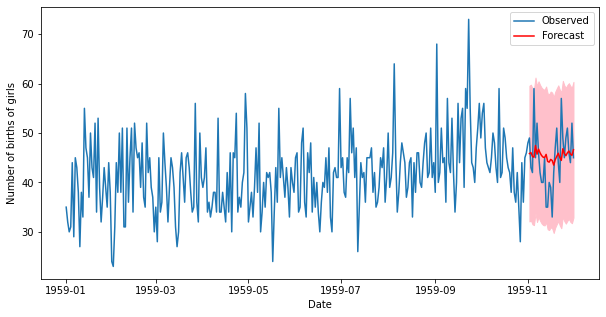

In [97]:
plt.figure(figsize = (10, 5))

plt.plot(y_train.index, y_train, label='Observed');

plt.plot(mean_forecast.index, mean_forecast, color='r', label='Forecast');

plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink');

plt.xlabel('Date');
plt.ylabel('Number of births of girls')
plt.legend();

In this case the result of the plot is more interpretable and seems to be realistic. 

### RESULTS

In this work we explored time series and coped with the challenges. 
In our work we can find how to visualise the time data, divide it into test samples and select the parameters.  
Since ARIMA was used as a modelling framework, we investigated its features. We found out that the best results are achieved with auto-arima, but the best results are achieved manually. 
Moreover, several approaches were evaluated - naive, auto, sarimax, one-step ahead and all showed different results 
Thus, we understand that Naive method isn't suited for datasets with high variability. It is best suited for stable datasets. We can still improve our score by adopting different techniques. SARIMAX naturally produced the best score and we were convinced by the visualisation that it describes the future of the time series in the most detail. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d0d8cca9-4523-4f04-ad16-e5f94c2cd3ac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>